In [431]:
from qiskit import *
from qiskit_aer import *
from qiskit.visualization import plot_bloch_multivector, visualize_transition, array_to_latex, plot_histogram
from numpy import pi
from qiskit.quantum_info import Statevector

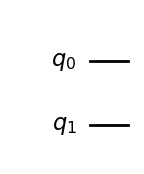

In [432]:
constant_oracle = QuantumCircuit(2)

output = np.random.randint(2)

if output == 1:
    constant_oracle.x(1)

constant_oracle.draw('mpl')

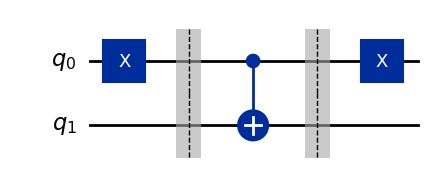

In [433]:
# creating a balanced oracle,
# 0 - control and 1 - the target.
balanced_oracle = QuantumCircuit(2)

# X-gate the input qubit
balanced_oracle.x(0)

balanced_oracle.barrier()

balanced_oracle.cx(0, 1)

# avoid cancelling gates by the transpiler 
balanced_oracle.barrier()

balanced_oracle.x(0)

balanced_oracle.draw('mpl')

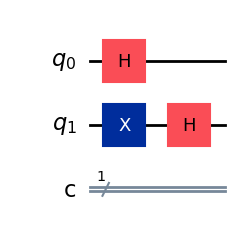

In [434]:
# initialise the input qubit in the state |+⟩
# and the output qubit in the state |−⟩
dj_circuit = QuantumCircuit(2, 1)

dj_circuit.h(0)

# Put the output qubit in a state |-⟩
dj_circuit.x(1)
dj_circuit.h(1)
dj_circuit.draw('mpl')

In [435]:
# define the oracle function to use
# oracle_fn = constant_oracle
oracle_fn = balanced_oracle

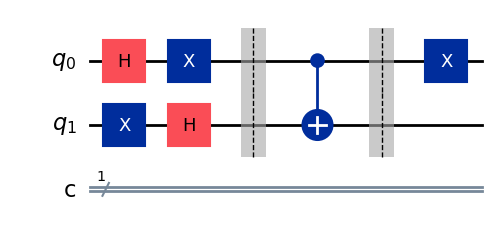

In [436]:
dj_circuit &= oracle_fn
dj_circuit.draw('mpl')

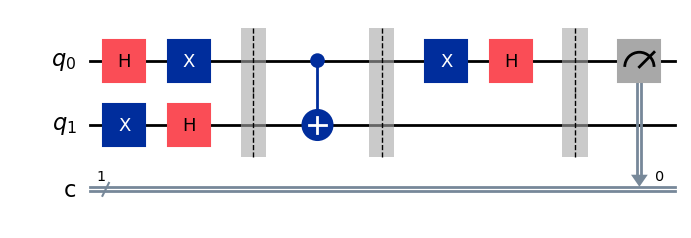

In [437]:
dj_circuit.h(0)
dj_circuit.barrier()

dj_circuit.measure(0, 0)

dj_circuit.draw('mpl')

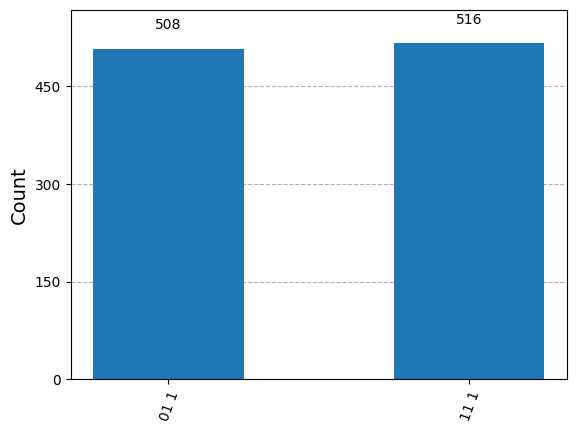

In [438]:
simulator = QasmSimulator()
dj_circuit.measure_all()
compiled_circuit = transpile(dj_circuit, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
plot_histogram(counts)